In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge

True function is $~\mathcal{h}(x) = sin(\pi x)$

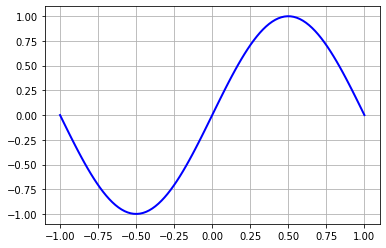

In [3]:
x = np.linspace(-1, 1, 100)
y = np.sin(np.pi * x)
plt.plot(x, y, 'b', linewidth = 2)
plt.grid(True)
plt.savefig('F1.jpg')

Consider two model:
* $~\mathcal{H_{0}}: h(x) = b$ horizontal line
* $~\mathcal{H_{1}}: h(x) = ax + b$ any line

for any two point $~(x_{0},y_{0}), (x_{1},y_{1})$ with $~x_{1} > x_{0}$
* For $~\mathcal{H_{0}}$, find the horizontal line with $~b=\frac{x_{0}+x_{1}}{2}$
* For $~\mathcal{H_{1}}$, find the line going through both points

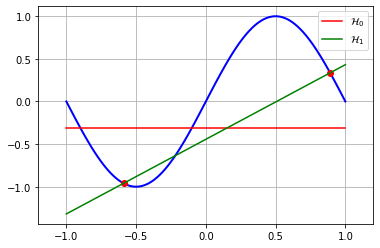

In [4]:
x0 = -1+2*np.random.rand((1))
y0 = np.sin(np.pi*x0)
x1 = -1+2*np.random.rand((1)) 
y1 = np.sin(np.pi*x1)
plt.plot(x, y, 'b', linewidth = 2)
plt.plot(x0, y0, 'ro', linewidth = 2)
plt.plot(x1, y1, 'ro', linewidth = 2)
plt.plot(x, np.ones(x.shape)*(y0+y1)/2, 'r', label = "$\mathcal{H}_0$")
plt.plot(x, (y1-y0)/(x1-x0)*(x-x0)+y0, 'g', label = "$\mathcal{H}_1$")
plt.xlim([-1.2, 1.2])
plt.grid(True)
plt.legend()
plt.savefig('F2.jpg')

In [5]:
def GetBiasVarianceH0():
    Nx = 1000
    Nd = 1000
    Data = np.zeros((Nx, Nd))
    X = np.random.random((Nx, 1))
    for i in np.arange(Nd):
        x0 = -1+2*np.random.rand((1))
        y0 = np.sin(np.pi*x0)
        x1 = -1+2*np.random.rand((1)) 
        y1 = np.sin(np.pi*x1)
        b = (y0+y1)/2
        Data[:,i] = b
    hX = np.sin(np.pi * X)
    EdhX = 1/Nd * np.sum(Data, axis = 1, keepdims = True)
    DataEdhX = EdhX @ np.ones((1, Nd))
    VarhX = 1/Nd*np.sum(np.power(Data - DataEdhX,2),axis = 1, keepdims = True)
    Bias = np.power(1/Nx*np.sum(hX - EdhX), 2)
    Variance = 1/Nx*np.sum(VarhX)
    return (Bias, Variance)

In [6]:
def GetBiasVarianceH1():
    Nx = 1000
    Nd = 1000
    Data = np.zeros((Nx, Nd))
    X = np.random.random((Nx, 1))
    for i in np.arange(Nd):
        x0 = -1+2*np.random.rand((1))
        y0 = np.sin(np.pi*x0)
        x1 = -1+2*np.random.rand((1)) 
        y1 = np.sin(np.pi*x1)
        a = ((y1 - y0)/(x1 - x0))
        b = (-(y1-y0)/(x1-x0)*x0+y0)
        Data[:,i] = b + a*X.ravel()
    hX = np.sin(np.pi * X)
    EdhX = 1/Nd * np.sum(Data, axis = 1, keepdims = True)
    DataEdhX = EdhX @ np.ones((1, Nd))
    VarhX = 1/Nd*np.sum(np.power(Data - DataEdhX,2),axis = 1, keepdims = True)
    Bias = np.power(1/Nx*np.sum(hX - EdhX), 2)
    Variance = 1/Nx*np.sum(VarhX)
    return (Bias, Variance)

In [7]:
print(GetBiasVarianceH0())
print(GetBiasVarianceH1())

(0.4225587441742556, 0.2543405157214452)
(0.04687465033382923, 1.6341464837915292)


# Low variance with large bias

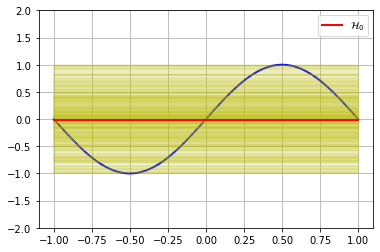

In [8]:
plt.plot(x, y, 'b', linewidth = 2)
b = []
for i in np.arange(1000):
    x0 = -1+2*np.random.rand((1))
    y0 = np.sin(np.pi*x0)
    x1 = -1+2*np.random.rand((1)) 
    y1 = np.sin(np.pi*x1)
    plt.plot(x,np.ones(x.shape)*(y0+y1)/2,'y',alpha=0.05)
    b.append((y0+y1)/2)
plt.plot(x,np.ones(x.shape)*np.average(b),'r',linewidth=2,label="$\mathcal{H}_0$")
plt.ylim([-2,2])
plt.grid(True)
plt.legend()
plt.savefig('F3.jpg')

# Low bias with large variance

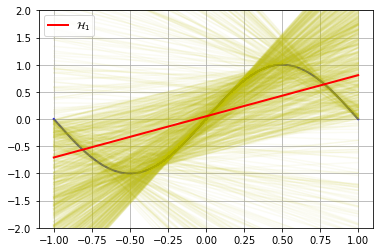

In [9]:
b = []
a = []
plt.plot(x, y, 'b', linewidth = 2)
for i in np.arange(1000):
    x0 = -1+2*np.random.rand((1))
    y0 = np.sin(np.pi*x0)
    x1 = -1+2*np.random.rand((1)) 
    y1 = np.sin(np.pi*x1)
    a.append((y1 - y0)/(x1 - x0))
    b.append(-(y1-y0)/(x1-x0)*x0+y0)
    plt.plot(x, (y1-y0)/(x1-x0)*(x-x0)+y0, 'y', alpha=0.05)
plt.plot(x,np.average(a)*x+np.average(b),'r',linewidth=2,label="$\mathcal{H}_1$")
plt.ylim([-2,2])
plt.grid(True)
plt.legend()
plt.savefig('F4.jpg')

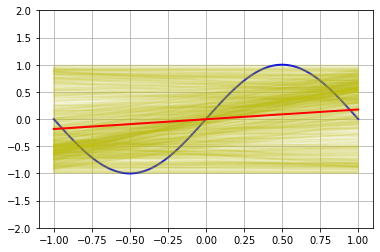

In [10]:
b = []
a = []
degree = 1
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
plt.plot(x, y, 'b', linewidth = 2)

for i in np.arange(1000):
    x0 = -1+2*np.random.rand((2))
    y0 = np.sin(np.pi*x0)
    model.fit(x0.reshape(-1,1),y0)
    y_pred = model.predict(x.reshape(-1,1))
    tmpA = []
    tmpB = []
    for i in range(len(x)-1):
        tmpA.append((y_pred[i+1] - y_pred[i])/(x[i+1]-x[i]))
        tmpB.append(-(y_pred[i+1] - y_pred[i])/(x[i+1]-x[i])*x[i]+y_pred[i])
    a.append(np.average(tmpA))
    b.append(np.average(tmpB))
    plt.plot(x, y_pred, 'y', alpha=0.05)
plt.plot(x,np.average(a)*x+np.average(b),'r',linewidth=2,label="$\mathcal{H}_1$")    
plt.ylim([-2,2])
plt.grid(True)
plt.savefig('F5.jpg')